# Projet Phase 3 #

#### Etudiant : Obed Antoine

Dataset choisi : Syriatel Customer Churn


Pour ce projet, nous nous intéressons à **SyriaTel**, une entreprise de télécommunications.  
Le stakeholder principal est le **département des ventes et marketing**, qui souhaite réduire le taux de **churn** (clients qui arrêtent d’utiliser les services).  

Le **problème métier** est de prédire quels clients sont susceptibles de **quitter le service**, afin de mettre en place des actions ciblées pour les fidéliser.  
Ceci constitue un **problème de classification binaire** :  

- `Churn = 1` ou `True` → le client risque de quitter  
- `Churn = 0` ou `False` → le client restera

# Objectif du projet

L’objectif de ce projet est de construire un **modèle de classification** capable de prédire si un client risque de quitter l’entreprise (**churn**) ou de rester fidèle.  
Le dataset contient déjà l’information historique (`Churn = True/False`), ce qui permet d’entraîner le modèle.  
Notre rôle est donc :  

- d’utiliser ces données pour **apprendre les comportements associés au churn**,  
- de tester la capacité du modèle à **prédire correctement de nouveaux cas**,  
- et d’identifier les **facteurs clés** expliquant pourquoi certains clients quittent, afin de fournir au département **Ventes et Marketing** des pistes d’actions pour améliorer la rétention client.  

# Etape du Projet

Ce projet suit une démarche stucturée en plusieurs étape afin de construiure en plusieurs épates afin de construire un modèle de la Machine Learning capable de predire les clients a risque de churn. 

#### 1) Exploration des donnees ( Data Understading)

#### 2) Data Preparation

#### 3) Modelisation

#### 4) Evaluation des Modeles et Selection du Modele final

#### 5) Interpretation des resultats

#### 6) Recommandation

# Etape 1 : Exploration des données (Data Understanding)

Dans cette section, nous allons :  
- Charger le dataset SyriaTel Churn  
- Examiner les premières lignes et les types de variables  
- Vérifier la distribution de la variable cible `Churn`  
- Identifier les valeurs manquantes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
display(df.head())

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#informations generale des donnees
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Statistiques descriptives pour les colonnes numériques
display(df.describe())

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000



Distribution de la target 'Churn' :


churn
False    2850
True      483
Name: count, dtype: int64

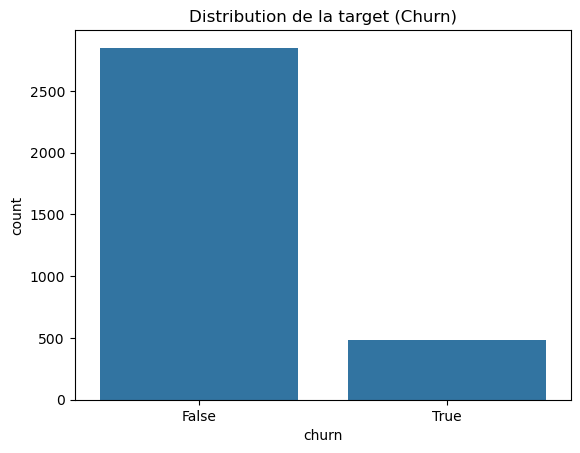

In [6]:
# Distribution de la target
print("\nDistribution de la target 'Churn' :")
display(df['churn'].value_counts())
sns.countplot(x='churn', data=df)
plt.title("Distribution de la target (Churn)")
plt.show()

In [7]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne :")
display(df.isnull().sum())


Valeurs manquantes par colonne :


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

# Etape 2 : Préparation des données (Data Preparation)

Dans cette section, nous allons préparer les données pour l'entraînement du modèle.  
Les étapes incluent : 
t  
1) Définition de X et y, et train-test split  
2) Identification des colonnes numériques et catégorielles  
3) Encodage des variables catégorielles    
4) Standardisation / scaling des colonnes numériques  
5) Vérification finale des données prêtes pour la modélisation

##### 1) Définition de X et y et séparation train/test

On sépare les variables explicatives (X) de la cible (y), et on divise le dataset en ensembles d'entraînement et de test (80%-20%) avec stratification.


In [10]:
from sklearn.model_selection import train_test_split

# Nom de la colonne cible
target_col = 'churn'

# Conversion en 0/1 si nécessaire
if df[target_col].dtype == object:
    df[target_col] = df[target_col].map({'Yes':1, 'No':0}).fillna(df[target_col])

# Séparation X et y
X = df.drop(columns=[target_col])
y = df[target_col]

# Train/test split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)


Train shape: (2666, 20) | Test shape: (667, 20)


##### 2) Identifier colonnes numériques et catégorielles

Cette étape nous permet de savoir quelles colonnes sont numériques et quelles colonnes sont catégorielles, pour préparer leur encodage.


In [11]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Colonnes numériques:", numeric_cols)
print("Colonnes catégorielles:", categorical_cols)

Colonnes numériques: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
Colonnes catégorielles: ['state', 'phone number', 'international plan', 'voice mail plan']


In [12]:
# Aperçu des colonnes catégorielles
for col in categorical_cols:
    n = X_train[col].nunique()
    sample = X_train[col].unique()[:5]
    print(f" - {col}: {n} modalités, exemples: {sample}")

 - state: 51 modalités, exemples: ['OH' 'IN' 'KY' 'NH' 'NJ']
 - phone number: 2666 modalités, exemples: ['352-2270' '402-1251' '403-1953' '390-4003' '387-2799']
 - international plan: 2 modalités, exemples: ['no' 'yes']
 - voice mail plan: 2 modalités, exemples: ['yes' 'no']


##### 3) Encodage des colonnes catégorielles

On convertit toutes les colonnes catégorielles en nombres pour que les modèles de machine learning puissent les utiliser.


In [34]:
# ----------------------------
#  Prétraitement avec ColumnTransformer 
# ----------------------------
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pipeline pour colonnes numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline pour colonnes catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Assemblage des deux pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)

# Fit sur train puis transformation train/test
preprocessor.fit(X_train)

X_train_prep = preprocessor.transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

print("Shape après prétraitement - Train:", X_train_prep.shape, " Test:", X_test_prep.shape)



Shape après prétraitement - Train: (2666, 2737)  Test: (667, 2737)


##### 4) Standardisation des colonnes numériques

Pour certains modèles (régression logistique, KNN), il est important de normaliser les colonnes numériques.


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

##### 5) Vérification finale des données prêtes pour la modélisation

On vérifie les dimensions et un aperçu des données préparées.


In [20]:
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)
display(X_train.head())
display(y_train.value_counts())


Train shape: (2666, 20) | Test shape: (667, 20)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
3286,35,0.125737,-0.512780,712,no,yes,1.606822,0.743376,0.225611,0.743639,0.426270,0.445403,0.426916,-0.843159,-0.195702,-0.842280,1.018565,1.436500,1.021815,-1.200212
86,15,-0.175309,-0.679502,2094,no,no,-0.588791,-0.401294,0.225611,-0.401678,-0.904961,0.045354,-0.903861,-0.218499,-0.808555,-0.219411,-0.800731,0.203496,-0.801460,1.875007
1349,17,-0.752313,1.749873,2128,no,yes,1.021325,-0.704945,0.325566,-0.704787,-0.746481,0.245378,-0.745379,0.390145,-0.042489,0.390111,-1.656870,-0.618506,-1.660249,0.337397
1649,30,0.727828,-0.679502,1757,no,no,-0.588791,-2.048368,-0.723960,-2.048208,-0.146239,0.495409,-0.146413,-0.580882,2.000353,-0.579785,0.055409,-0.207505,0.057329,-1.200212
3000,31,-0.350919,1.749873,1682,no,no,-0.588791,0.800425,0.425520,0.799931,-1.449735,-0.704736,-1.449223,1.777611,-0.859626,1.778219,1.517980,-0.207505,1.523876,1.106202


churn
False    2280
True      386
Name: count, dtype: int64

# Etape 3:  Modélisation : Entraînement des modèles

Nous allons entraîner plusieurs modèles de classification pour prédire le churn des clients.  
Les modèles choisis sont :  

- **Régression Logistique** : modèle de base, simple et interprétable.  
- **Random Forest** : modèle d’arbres, robuste et performant sur des données mixtes.  
- **Gradient Boosting (XGBoost ou GradientBoostingClassifier)** : modèle puissant, souvent performant pour ce type de problème.  

Nous comparerons leurs résultats sur les données de test.  


In [23]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Fonction d'évaluation
def eval_model(model, model_name, X_train, y_train, X_test, y_test, results_list):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n===== Résultats pour {model_name} =====")
    print("Accuracy :", round(acc, 3))
    print("Precision:", round(prec, 3))
    print("Recall   :", round(rec, 3))
    print("F1-score :", round(f1, 3))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("="*60)
    
    # Sauvegarde des résultats pour comparaison finale
    results_list.append({
        "Modèle": model_name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-score": round(f1, 3)
    })

# Liste pour stocker les résultats
results = []

# 1) Régression Logistique
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])
eval_model(log_reg, "Régression Logistique", X_train, y_train, X_test, y_test, results)

# 2) Random Forest
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])
eval_model(rf, "Random Forest", X_train, y_train, X_test, y_test, results)

# 3) Gradient Boosting
gb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])
eval_model(gb, "Gradient Boosting", X_train, y_train, X_test, y_test, results)

# Tableau comparatif final
results_df = pd.DataFrame(results)
print("\n===== Comparaison finale des modèles =====")
display(results_df)



===== Résultats pour Régression Logistique =====
Accuracy : 0.859
Precision: 0.533
Recall   : 0.247
F1-score : 0.338

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667


===== Résultats pour Random Forest =====
Accuracy : 0.906
Precision: 0.925
Recall   : 0.381
F1-score : 0.54

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.99      0.95       570
        True       0.93      0.38      0.54        97

    accuracy                           0.91       667
   macro avg       0.91      0.69      0.74       667
weighted avg       0.91      0.91      0.89       667


===== Résultats pour Gradient Boosting =====
Accuracy : 0.93
Precisi

,Modèle,Accuracy,Precision,Recall,F1-score
0,Régression Logistique,0.859,0.533,0.247,0.338
1,Random Forest,0.906,0.925,0.381,0.540
2,Gradient Boosting,0.930,0.879,0.598,0.712


# Etape 4 : Évaluation et sélection du modèle final

Après avoir entraîné plusieurs modèles de classification (Régression Logistique, Random Forest, Gradient Boosting), nous comparons leurs performances pour déterminer lequel sera utilisé pour la prise de décision.

*Métrique principale : Recall sur les clients à risque de churn (`Churn = 1`)*

- Le **Recall** mesure la capacité du modèle à détecter correctement les clients qui risquent de quitter.  
- Une valeur élevée de Recall est prioritaire pour la business unit, car il est plus important d'identifier les clients à risque, même si cela inclut quelques faux positifs.

Nous examinons également :  
- **Accuracy** : pour une vue globale de la performance.  
- **Precision** : pour savoir combien des clients prédits comme churn l'étaient réellement.  
- **F1-score** : compromis entre Precision et Recall.  

À partir de ces métriques, nous sélectionnerons le modèle final et analyserons les features les plus importantes qui influencent le churn.


In [24]:
# 1) Identifier la métrique clé (Recall sur Churn = 1)
# On regarde le tableau results_df
print("Tableau comparatif des modèles :")
display(results_df)

Tableau comparatif des modèles :


,Modèle,Accuracy,Precision,Recall,F1-score
0,Régression Logistique,0.859,0.533,0.247,0.338
1,Random Forest,0.906,0.925,0.381,0.540
2,Gradient Boosting,0.930,0.879,0.598,0.712


In [38]:
# Supposons que notre métrique principale soit le Recall
best_model_name = results_df.loc[results_df['Recall'].idxmax(), 'Modèle']
print(f"\nLe modèle sélectionné pour l'étape finale est : {best_model_name}")
# 2) Créer un objet du modèle final pour extraction des importances
if best_model_name == "Régression Logistique":
    final_model = log_reg
elif best_model_name == "Random Forest":
    final_model = rf
else:
    final_model = gb

# Réentraîner sur tout le train set
final_model.fit(X_train, y_train)


Le modèle sélectionné pour l'étape finale est : Gradient Boosting


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'area code',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls...
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge',
                                                   'customer service calls']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['state', 'phone number',
                                                   'international plan',
                                                   'voice mail plan'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [39]:
# 3) Interprétation des features
# Pour la régression logistique : coefficients
if best_model_name == "Régression Logistique":
    coef = final_model.named_steps['classifier'].coef_[0]
    # Récupération des noms des colonnes après OneHotEncoding
    cat_features = final_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
    all_features = numeric_cols + list(cat_features)
    feature_importance = pd.Series(coef, index=all_features).sort_values(key=abs, ascending=False)
    
    print("\nTop 10 features influençant le churn :")
    display(feature_importance.head(10))

# Pour Random Forest / Gradient Boosting : feature_importances_
else:
    importances = final_model.named_steps['classifier'].feature_importances_
    # Récupération des noms des colonnes après OneHotEncoding
    cat_features = final_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
    all_features = numeric_cols + list(cat_features)
    feature_importance = pd.Series(importances, index=all_features).sort_values(ascending=False)
    
    print("\nTop 10 features influençant le churn :")
    display(feature_importance.head(10))



Top 10 features influençant le churn :


customer service calls    0.172987
total day charge          0.172229
international plan_no     0.115494
total day minutes         0.109096
total eve minutes         0.075125
international plan_yes    0.066740
voice mail plan_no        0.046864
total eve charge          0.034952
number vmail messages     0.031219
total intl calls          0.029801
dtype: float64

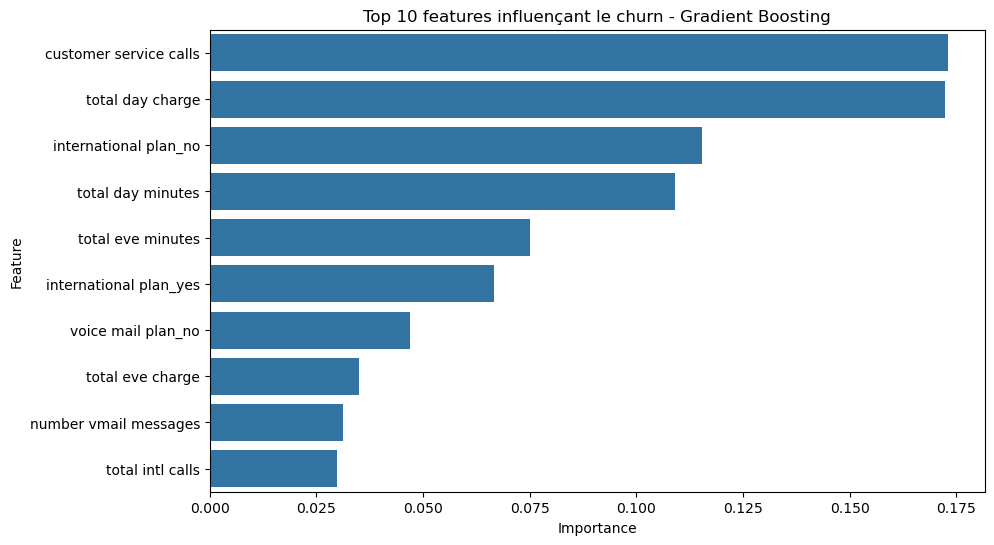

In [40]:
# 4) Visualisation rapide des importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.head(10).values, y=feature_importance.head(10).index)
plt.title(f"Top 10 features influençant le churn - {best_model_name}")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Etape 5 : Évaluation et interprétation des resultats

### 1) Performance du modèle final

- **Modèle choisi : Gradient Boosting**
Nous avons choisi le Grandient Boosting, car il donne la valeur la plus élevée de Recall. Car c'est prioritaire pour Syriatel, car il est plus important d'identifier les clients à risque, même si cela inclut quelques faux positifs.

  - **Recall = 0.598** → le modèle identifie environ **60% des clients susceptibles de quitter SyriaTel**.
    - Pour le département Marketing, cela signifie que sur 10 clients à risque, 6 seront détectés avant qu’ils ne partent.
  - **Precision = 0.879** → parmi les clients que le modèle prédit comme churn, **88% le sont réellement**.
    - Limite le gaspillage de ressources sur des clients qui ne quitteraient pas.
  - **F1-score = 0.712** → bon compromis entre Recall et Precision, donc efficace pour la rétention proactive.

> En termes simples, ce modèle permet de **cibler correctement la majorité des clients à risque**, avec peu de faux positifs, rendant les actions de rétention plus efficaces.

---

### 2) Top 10 features influençant le churn

Ces features expliquent pourquoi certains clients risquent de quitter :

| Feature | Importance | Interprétation business |
|---------|-----------|------------------------|
| customer service calls | 0.173 | Les clients ayant fréquemment recours au service client présentent un risque élevé de résiliation. Cette variable est la plus déterminante du modèle. → améliorer la qualité du support. |
| total day charge | 0.172 | Des factures élevées durant la journée sont fortement corrélées avec un risque de départ. → offrir des réductions ou packages ciblés. |
| international plan_no | 0.115 | L’absence de plan international est un facteur clé associé au churn. Les clients avec un forfait international semblent plus fidèles. → proposer des plans adaptés. |
| total day minutes | 0.109 | Plus un client passe d’appels en journée, plus la probabilité de churn augmente. → détecter les clients sur-sollicités ou insatisfaits. |
| total eve minutes | 0.075 | Une consommation importante en soirée est aussi un indicateur, mais moins fort que celle de la journée. → segmenter les offres selon habitudes horaires. |
| international plan_yes | 0.067 | Certains clients avec plan international peuvent aussi partir → surveiller ces segments. |
| voice mail plan_no | 0.047 | Les clients sans messagerie vocale présentent un risque légèrement plus élevé de résiliation. → proposer des services complémentaires. |
| total eve charge | 0.035 | Facturation soirée → ajuster les tarifs ou offres pour ces clients. |
| number vmail messages | 0.031 | Peu de messages vocaux → clients moins engagés → encourager l’usage du service. |
| total intl calls | 0.030 | Appels internationaux → certains segments sensibles au coût peuvent partir. |

> Ces informations permettront a SyriaTel de **prioriser les actions de rétention** selon les facteurs les plus critiques.

---

###  3) Bénéfices pour SyriaTel

1. **Ciblage précis des clients à risque** → maximiser le retour sur investissement des actions de rétention.  
2. **Compréhension des facteurs de churn** → décisions stratégiques éclairées : offres promotionnelles, plans adaptés, amélioration du service client.  
3. **Réduction du churn** → fidélisation accrue et augmentation des revenus à long terme.


# Etape 6 :  Recommandations et Conclusion

###  Résumé
L’analyse menée sur le dataset **SyriaTel Customer Churn** a permis de construire un modèle prédictif visant à identifier les clients les plus susceptibles de résilier.  
- **Modèle retenu** : Gradient Boosting  
- **Performance clé** : Recall = **0.598** (le modèle identifie environ 60% des clients à risque).  
- **Valeur ajoutée** : cet outil permet d’anticiper les départs et d’orienter les efforts de rétention vers les profils les plus vulnérables.  

---

### Recommandations métier et utilisation pratique

#### 1. Utilisation pratique du modèle
- Le modèle permet d’**identifier chaque mois les clients les plus susceptibles de quitter SyriaTel**.  
- Les clients à risque peuvent être **priorisés** pour des actions ciblées : offres personnalisées, suivi par le service client, promotions spéciales.  
- Cela permet à l’équipe marketing et aux équipes de vente de **concentrer leurs efforts là où cela compte le plus**, plutôt que de contacter tous les clients de manière uniforme.  
- Le suivi régulier des clients identifiés comme “à risque” permettra de **réduire le churn** et d’améliorer la satisfaction client.

#### 2. Exemples d’actions recommandées
- Contact proactif du service client pour les clients ayant plusieurs appels ou réclamations.  
- Offres ciblées (remises, upgrade de forfait, packs internationaux) pour les clients à forte utilisation.  
- Programmes de fidélité ou essais gratuits pour les clients sans messagerie vocale ou sans plan international.

---

### Limites et perspectives
- Données historiques limitées : il serait utile d’ajouter des informations sur la satisfaction client ou la concurrence.  
- Surveiller le **drift** : si le profil client évolue, le modèle peut perdre en performance → mettre en place un suivi régulier.  
- Perspectives : collecte continue de nouvelles données, réentraînement régulier, expérimentation A/B des actions de rétention.

---

###  Conclusion
Le modèle développé constitue un outil d’aide à la décision pour la **réduction du churn chez SyriaTel**.  
En mettant en œuvre les recommandations proposées, l’entreprise peut : 
- Cibler les clients à risque,
- Optimiser les actions marketing et de fidélisation.
- Diminuer le taux de résiliation.  
- Améliorer l’expérience client.  
- Consolider sa compétitivité sur le marché des télécommunications.
